<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

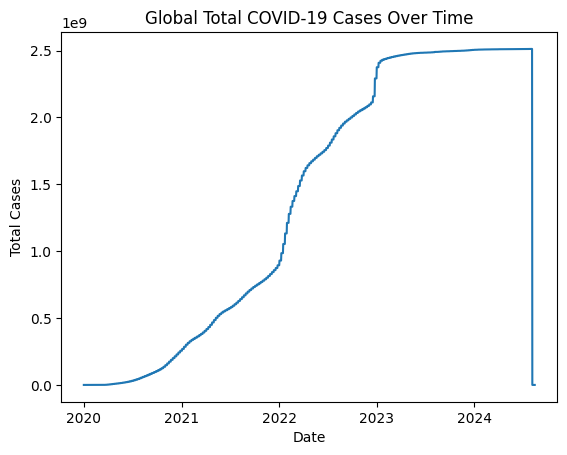

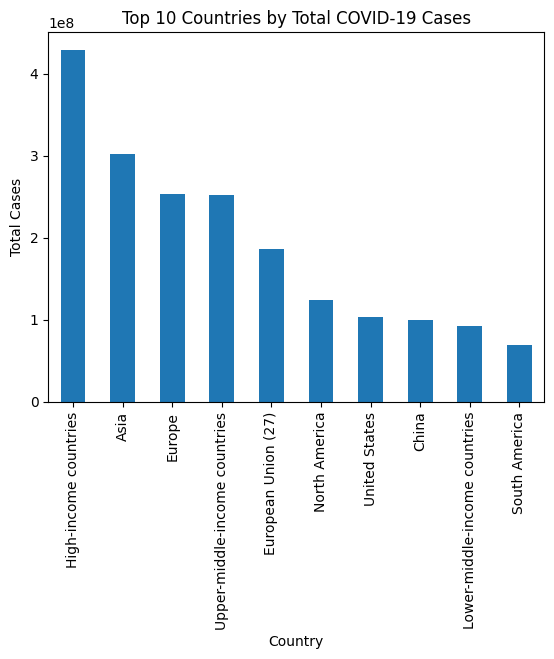

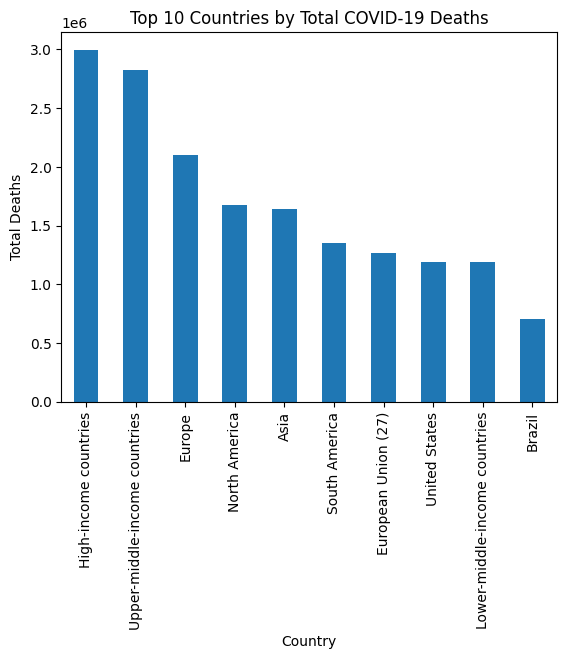

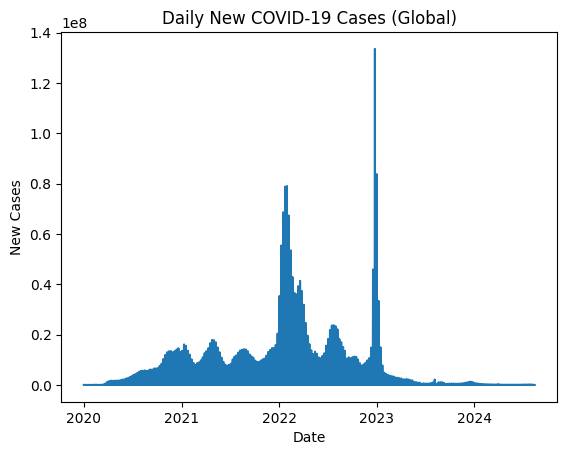

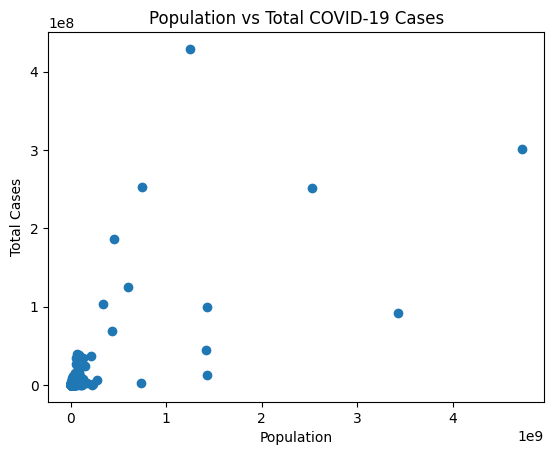

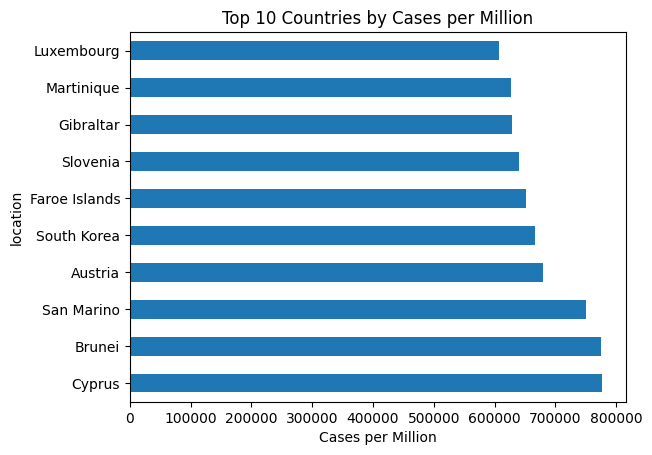

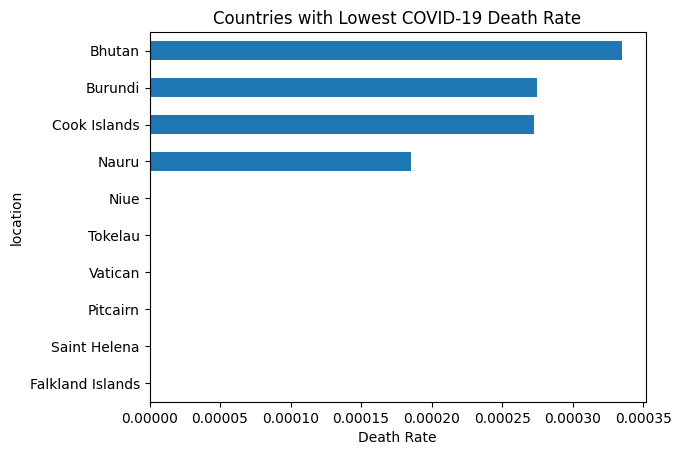

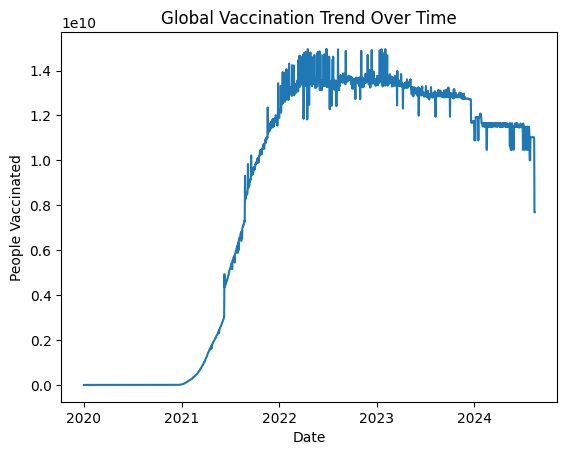

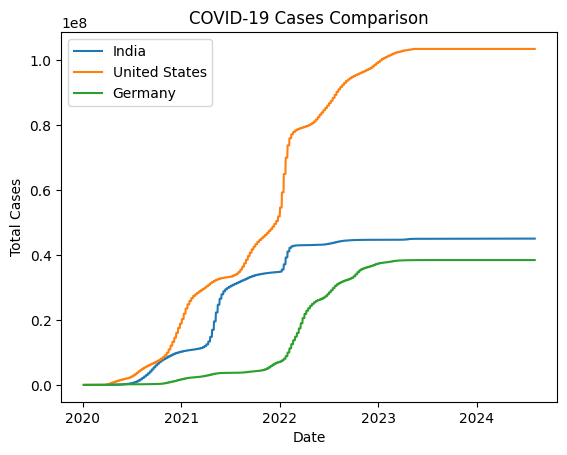

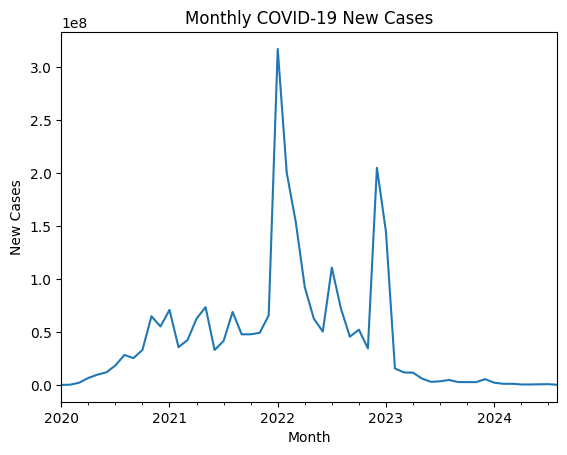

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("owid-covid-data.zip")
df.head()
df.shape
df.columns
df.info()
columns_needed = [
    "location", "date", "total_cases", "new_cases",
    "total_deaths", "population", "people_vaccinated"
]

df = df[columns_needed]
df.head()
df["date"] = pd.to_datetime(df["date"])
df = df.dropna(subset=["location", "date"])
df = df[df["location"] != "World"]
df.to_csv("covid_cleaned.csv", index=False)
global_cases = df.groupby("date")["total_cases"].sum()
plt.figure()
plt.plot(global_cases)
plt.title("Global Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()

top_cases = df.groupby("location")["total_cases"].max().sort_values(ascending=False).head(10)

plt.figure()
top_cases.plot(kind="bar")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.show()
top_deaths = df.groupby("location")["total_deaths"].max().sort_values(ascending=False).head(10)

plt.figure()
top_deaths.plot(kind="bar")
plt.title("Top 10 Countries by Total COVID-19 Deaths")
plt.xlabel("Country")
plt.ylabel("Total Deaths")
plt.show()
daily_cases = df.groupby("date")["new_cases"].sum()

plt.figure()
plt.plot(daily_cases)
plt.title("Daily New COVID-19 Cases (Global)")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()
country_data = df.groupby("location").max()

plt.figure()
plt.scatter(country_data["population"], country_data["total_cases"])
plt.title("Population vs Total COVID-19 Cases")
plt.xlabel("Population")
plt.ylabel("Total Cases")
plt.show()
country_data["cases_per_million"] = (
    country_data["total_cases"] / country_data["population"] * 1_000_000
)

top_cases_pm = country_data["cases_per_million"].sort_values(ascending=False).head(10)

plt.figure()
top_cases_pm.plot(kind="barh")
plt.title("Top 10 Countries by Cases per Million")
plt.xlabel("Cases per Million")
plt.show()
country_data["death_rate"] = (
    country_data["total_deaths"] / country_data["total_cases"]
)

death_rate = country_data["death_rate"].sort_values().head(10)

plt.figure()
death_rate.plot(kind="barh")
plt.title("Countries with Lowest COVID-19 Death Rate")
plt.xlabel("Death Rate")
plt.show()
vaccination_trend = df.groupby("date")["people_vaccinated"].sum()

plt.figure()
plt.plot(vaccination_trend)
plt.title("Global Vaccination Trend Over Time")
plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.show()
countries = ["India", "United States", "Germany"]

plt.figure()
for country in countries:
    country_df = df[df["location"] == country]
    plt.plot(country_df["date"], country_df["total_cases"], label=country)

plt.legend()
plt.title("COVID-19 Cases Comparison")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()
df["month"] = df["date"].dt.to_period("M")
monthly_cases = df.groupby("month")["new_cases"].sum()

plt.figure()
monthly_cases.plot()
plt.title("Monthly COVID-19 New Cases")
plt.xlabel("Month")
plt.ylabel("New Cases")
plt.show()
